# **Đọc thư viện**

In [ ]:
!pip install transformers
import pandas as pd
import numpy as np
import re
import torch
import torch.nn as nn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Đọc dữ liệu**

In [ ]:
#Gán tên cột cho bộ dữ liệu
column_names = ['citations', 'task1', 'task2','purpose','name_of_paper','link_to_paper']

#Đọc dữ liệu
data = pd.read_csv('/content/drive/MyDrive/DS204/Dataset/Citations_dataset.csv',header=None,names=column_names)

In [ ]:
X = data[['citations']]

In [ ]:
X

,citations
0,"In order to test this hypothesis , our source ..."
1,"Large scale annotated corpora , e . g ., the P..."
2,The corpora are detailed in Table 1 . Links to...
3,Training of a classifier (’ language annotator...
4,http :// www . hf . uio . no / tekstlab / for ...
...,...
2493,A transition-based parser for Chinese.
2494,One billion word benchmark for measuring progr...
2495,Distributed representations of sentences and d...
2496,A fast and accurate dependency parser using ne...


In [ ]:
y = data[["task1","task2","purpose"]]

In [ ]:
y

,task1,task2,purpose
0,Substance,Data,Present
1,Substance,Data,Present
2,Substance,Data,Present
3,Substance,Data,Present
4,Substance,Data,Present
...,...,...,...
2493,Addition,Methodology,Present
2494,Addition,Methodology,Present
2495,Addition,Methodology,Present
2496,Addition,Methodology,Present


# **Tiền xử lý**

In [ ]:
X

,citations
0,"In order to test this hypothesis , our source ..."
1,"Large scale annotated corpora , e . g ., the P..."
2,The corpora are detailed in Table 1 . Links to...
3,Training of a classifier (’ language annotator...
4,http :// www . hf . uio . no / tekstlab / for ...
...,...
2493,A transition-based parser for Chinese.
2494,One billion word benchmark for measuring progr...
2495,Distributed representations of sentences and d...
2496,A fast and accurate dependency parser using ne...


In [ ]:
#number of "task1" labels
y['task1'].value_counts()

Approach     914
Addition     862
Substance    722
Name: task1, dtype: int64

In [ ]:
#number of "task2" labels
y['task2'].value_counts()

Instrument     438
File           370
Site           369
Data           364
Script         356
Methodology    301
Publication    300
Name: task2, dtype: int64

In [ ]:
#number of "purpose" labels
y['purpose'].value_counts()

Utilize     896
Present     831
Generate    771
Name: purpose, dtype: int64

In [ ]:
#number of null values
X.isnull().any()

citations    False
dtype: bool

([<matplotlib.patches.Wedge at 0x7efbc090a6b0>,
 [Text(0.5144905053717638, 0.9722651489600496, 'Addition'),
  Text(-1.0829936503179232, -0.19267784867768334, 'Approach'),
  Text(0.6768399161021714, -0.8671145990991074, 'Substance')],
 [Text(0.2806311847482348, 0.5303264448872997, '34.51%'),
  Text(-0.5907238092643217, -0.10509700836964546, '36.59%'),
  Text(0.3691854087830026, -0.47297159950860396, '28.90%')])

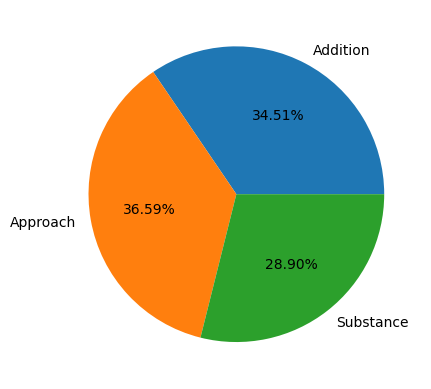

In [ ]:
#number of "task1" labels
import matplotlib.pyplot as plt
label, number_count = np.unique(y['task1'],return_counts = True)
plt.pie(number_count,labels=label,autopct="%1.2f%%")


([<matplotlib.patches.Wedge at 0x7efbbfff27d0>,
 [Text(0.9867384031901362, 0.4861556578605051, 'Data'),
  Text(0.2076411785395269, 1.0802245789532454, 'File'),
  Text(-0.8089510300831921, 0.7453846194598749, 'Instrument'),
  Text(-1.0812554540245989, -0.2022044587590952, 'Methodology'),
  Text(-0.6481296400846664, -0.888778920566707, 'Publication'),
  Text(0.21307271946872777, -1.0791663524305235, 'Script'),
  Text(0.9836618673732427, -0.4923508207323162, 'Site')],
 [Text(0.5382209471946197, 0.2651758133784573, '14.57%'),
  Text(0.11325882465792375, 0.5892134067017701, '14.81%'),
  Text(-0.4412460164090139, 0.4065734287962953, '17.53%'),
  Text(-0.5897757021952357, -0.11029334114132465, '12.05%'),
  Text(-0.35352525822799985, -0.4847885021272947, '12.01%'),
  Text(0.11622148334657877, -0.588636192234831, '14.25%'),
  Text(0.5365428367490414, -0.2685549931267179, '14.77%')])

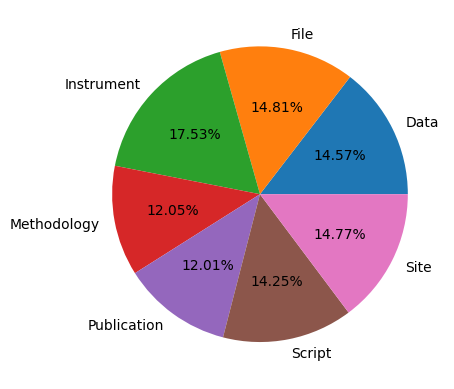

In [ ]:
#number of "task2" labels
import matplotlib.pyplot as plt
label, number_count = np.unique(y['task2'],return_counts = True)
plt.pie(number_count,labels=label,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x7efbbde5fbe0>,
 [Text(0.6221534787933412, 0.9071521640967097, 'Generate'),
  Text(-1.0864355224132796, 0.17221456279474356, 'Present'),
  Text(0.4724589331144202, -0.9933692951366998, 'Utilize')],
 [Text(0.339356442978186, 0.494810271325478, '30.86%'),
  Text(-0.5926011940436069, 0.09393521606986012, '33.27%'),
  Text(0.25770487260786556, -0.5418377973472908, '35.87%')])

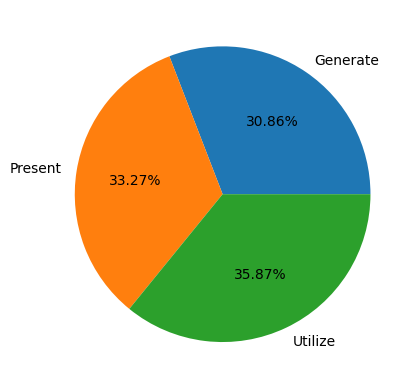

In [ ]:
#number of "purpose" labels
import matplotlib.pyplot as plt
label, number_count = np.unique(y['purpose'],return_counts = True)
plt.pie(number_count,labels=label,autopct="%1.2f%%")

In [ ]:
#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [ ]:
X_train = X_train['citations'].tolist()
X_test = X_test['citations'].tolist()

In [ ]:
list_word = X_train + X_test

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(list_word)
X_train_vectorized = vectorizer.transform(X_train)

In [ ]:
X_train_vectorized

<1998x14086 sparse matrix of type '<class 'numpy.float64'>'
	with 82734 stored elements in Compressed Sparse Row format>

In [ ]:
a = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
a

,00,000,0000005,0002,001,00198451,00203866,0022,003,00537,...,ついて,ていい,という,となると,にかけては,兼职,变坏,恶化,晋升,晋什
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_test_vectorized

<500x14086 sparse matrix of type '<class 'numpy.float64'>'
	with 21137 stored elements in Compressed Sparse Row format>

In [ ]:
b = pd.DataFrame(X_test_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
b

,00,000,0000005,0002,001,00198451,00203866,0022,003,00537,...,ついて,ていい,という,となると,にかけては,兼职,变坏,恶化,晋升,晋什
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#encode label
label_encode_task1 = LabelEncoder()
y_train_task1 = label_encode_task1.fit_transform(y_train['task1'])
label_encode_task1.classes_

array(['Addition', 'Approach', 'Substance'], dtype=object)

In [ ]:
label_encode_task2 = LabelEncoder()
y_train_task2 = label_encode_task2.fit_transform(y_train['task2'])
label_encode_task2.classes_

array(['Data', 'File', 'Instrument', 'Methodology', 'Publication',
       'Script', 'Site'], dtype=object)

In [ ]:
label_encode_purpose = LabelEncoder()
y_train_purpose = label_encode_purpose.fit_transform(y_train['purpose'])
label_encode_purpose.classes_

array(['Generate', 'Present', 'Utilize'], dtype=object)

In [ ]:
y_multi_label_train = np.c_[y_train_task1,y_train_task2,y_train_purpose]

In [ ]:
label_encode_task1_test = LabelEncoder()
y_test_task1 = label_encode_task1_test.fit_transform(y_test['task1'])
label_encode_task1_test.classes_

array(['Addition', 'Approach', 'Substance'], dtype=object)

In [ ]:
label_encode_task2_test = LabelEncoder()
y_test_task2 = label_encode_task2_test.fit_transform(y_test['task2'])
label_encode_task2_test.classes_

array(['Data', 'File', 'Instrument', 'Methodology', 'Publication',
       'Script', 'Site'], dtype=object)

In [ ]:
label_encode_purpose_test = LabelEncoder()
y_train_purpose_test = label_encode_purpose_test.fit_transform(y_test['purpose'])
label_encode_purpose_test.classes_

array(['Generate', 'Present', 'Utilize'], dtype=object)

In [ ]:
y_multi_label_test = np.c_[y_test_task1,y_test_task2,y_train_purpose_test]

# **Vẽ biểu đồ phân bố nhãn**

In [ ]:
number_label_acl_task1 = [132,160,150]
number_label_acl_task2 = [88,88,82,103,75,71,56]
number_label_acl_purpose = [158,150,183]

In [ ]:
number_label_arxiv_task1 = [102,125,115]
number_label_arxiv_task2 = [66,71,57,80,62,56,55]
number_label_arxiv_purpose = [132,120,136]

In [ ]:
number_label_neurips_task1 = [97,119,110]
number_label_neurips_task2 = [58,
62,
48,
68,
50,
48,
28
]
number_label_neurips_purpose = [134,
104,
112
]

In [ ]:
number_label_biomed_task1 = [85,
105,
95
]
number_label_biomed_task2 = [42,
49,
41,
61,
41,
45,
31
]
number_label_biomed_purpose = [113,
86,
101
]

In [ ]:
number_label_plos_pathogens_task1 = [83,
103,
93
]
number_label_plos_pathogens_task2 = [36,
49,
47,
60,
39,
42,
40
]
number_label_plos_pathogens_purpose = [110,
84,
95
]

In [ ]:
number_label_researchgate_task1 = [71,
88,
80]
number_label_researchgate_task2 = [31,
40,
32,
51,
35,
37,
33
]
number_label_researchgate_purpose = [99,
86,
72
]

In [ ]:
number_label_ieeexplore_task1 = [63,
78,
70
]
number_label_ieeexplore_task2 = [27,
35,
28,
47,
31,
31,
28
]
number_label_ieeexplore_purpose = [88,
76,
68
]

In [ ]:
number_label_other_task1 = [89,
136,
149
]
number_label_other_task2 = [16,
44,
21,
85,
37,
39,
29
]
number_label_other_purpose = [62,
65,
64
]

In [ ]:
colors_3 = ['#ff8c00','#87ceeb','#fafad2']
colors_8 = ['red', '#87ceeb', '#fafad2', '#ff8c00', 'gray', 'yellow', 'pink', '#f4a460']

In [ ]:
label_task1 = ["Substance",
"Approach",
"Addition"]
label_task2 = ["Data",
"Instrument",
"Script",
"Methodology",
"File",
"Site",
"Publication"
]
label_purpose = ["Utilize",
"Generate",
"Present"
]

Text(0.5, 0.98, 'Resource')

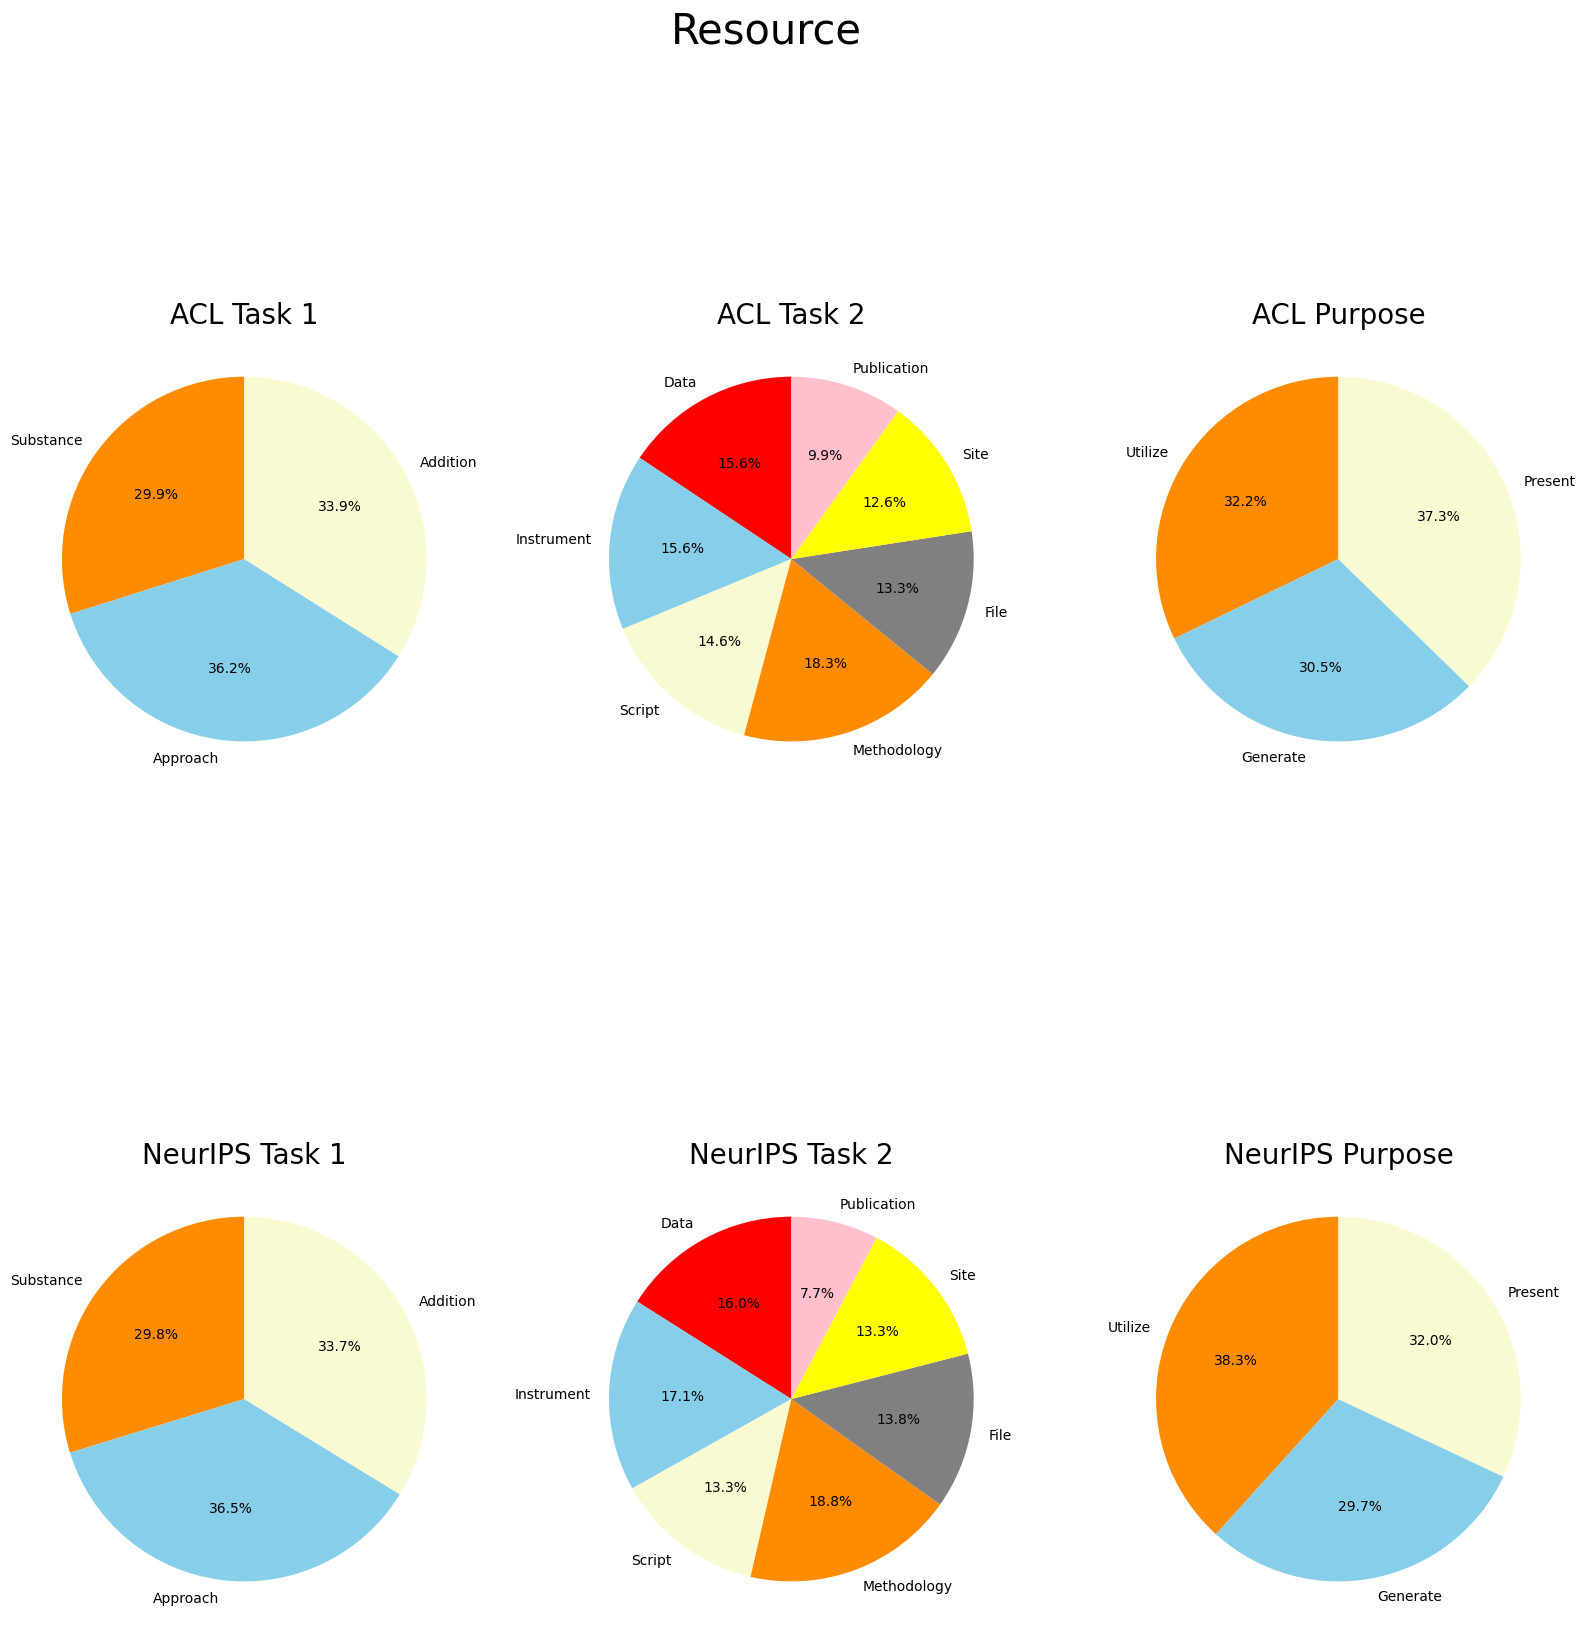

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(20,20))

axs[0,0].pie(number_label_acl_task1,labels=label_task1, colors=colors_3, autopct='%1.1f%%', startangle=90)
axs[0,0].set_title('ACL Task 1', loc='center',fontsize=20)

axs[0,1].pie(number_label_acl_task2,labels=label_task2, colors=colors_8, autopct='%1.1f%%', startangle=90)
axs[0,1].set_title('ACL Task 2', loc='center',fontsize=20)

axs[0,2].pie(number_label_acl_purpose,labels=label_purpose, colors=colors_3, autopct='%1.1f%%', startangle=90)
axs[0,2].set_title('ACL Purpose', loc='center',fontsize=20)

axs[1,0].pie(number_label_neurips_task1,labels=label_task1, colors=colors_3, autopct='%1.1f%%', startangle=90)
axs[1,0].set_title('NeurIPS Task 1', loc='center',fontsize=20)

axs[1,1].pie(number_label_neurips_task2,labels=label_task2, colors=colors_8, autopct='%1.1f%%', startangle=90)
axs[1,1].set_title('NeurIPS Task 2', loc='center',fontsize=20)

axs[1,2].pie(number_label_neurips_purpose,labels=label_purpose, colors=colors_3, autopct='%1.1f%%', startangle=90)
axs[1,2].set_title('NeurIPS Purpose', loc='center',fontsize=20)

fig.suptitle('Resource',fontsize=30)

# **Các mô hình phân loại**

# **KNN**

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_vectorized, y_multi_label_train)

KNeighborsClassifier()

In [ ]:
test_sample = ['In order to test this hypothesis, we conducted a series of experiments.']
test_sample_vectorized = vectorizer.transform(test_sample)
predictions = knn_clf.predict(test_sample_vectorized)

print('Predicted labels KNN:', predictions)

Predicted labels KNN: [[1 0 2]]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_label_knn = knn_clf.predict(X_test_vectorized)

true_labels_flat_knn = [label for sublist in y_multi_label_test for label in sublist]
predicted_labels_flat_knn = [label for sublist in y_pred_label_knn for label in sublist]

accuracy_knn = accuracy_score(true_labels_flat_knn, predicted_labels_flat_knn)

print("Accuracy KNN:", accuracy_knn)

Accuracy KNN: 0.468


In [ ]:
classification_report_knn = classification_report(true_labels_flat_knn, predicted_labels_flat_knn)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.45      0.60      0.52       414
           1       0.52      0.44      0.47       432
           2       0.50      0.46      0.48       389
           3       0.32      0.18      0.24        65
           4       0.36      0.33      0.35        54
           5       0.42      0.44      0.43        71
           6       0.38      0.36      0.37        75

    accuracy                           0.47      1500
   macro avg       0.42      0.40      0.41      1500
weighted avg       0.47      0.47      0.46      1500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Convert labels to strings
true_labels_flat_knn = [str(label) for label in true_labels_flat_knn]
predicted_labels_flat_knn = [str(label) for label in predicted_labels_flat_knn]

# Calculate precision, recall, F1-score, and support for each label
precision_task1, recall_task1, f1_task1, support_task1 = precision_recall_fscore_support(true_labels_flat_knn, predicted_labels_flat_knn, labels=label_encode_task1_test.classes_, zero_division=0)
precision_task2, recall_task2, f1_task2, support_task2 = precision_recall_fscore_support(true_labels_flat_knn, predicted_labels_flat_knn, labels=label_encode_task2_test.classes_, zero_division=0)
precision_purpose, recall_purpose, f1_purpose, support_purpose = precision_recall_fscore_support(true_labels_flat_knn, predicted_labels_flat_knn, labels=label_encode_purpose_test.classes_, zero_division=0)

# Calculate F1-macro for Task 1
f1_macro_task1 = f1_score(true_labels_flat_knn, predicted_labels_flat_knn, average='macro', labels=label_encode_task1_test.transform(label_encode_task1_test.classes_))

# Calculate F1-macro for Task 2
f1_macro_task2 = f1_score(true_labels_flat_knn, predicted_labels_flat_knn, average='macro', labels=label_encode_task2_test.transform(label_encode_task2_test.classes_))

# Calculate F1-macro for Purpose
f1_macro_purpose = f1_score(true_labels_flat_knn, predicted_labels_flat_knn, average='macro', labels=label_encode_purpose_test.transform(label_encode_purpose_test.classes_))

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [ ]:
# Print F1-macro for Task 1
print("F1-macro Task 1:", f1_macro_task1)

# Print F1-macro for Task 2
print("F1-macro Task 2:", f1_macro_task2)

# Print F1-macro for Purpose
print("F1-macro Purpose:", f1_macro_purpose)

F1-macro Task 1: 0.48854919905558863
F1-macro Task 2: 0.4064282936141052
F1-macro Purpose: 0.48854919905558863


# **SVM**

In [ ]:
svm = SVC(kernel='linear')

# Create a multi-output classifier using the SVM classifier
multi_output_svm = MultiOutputClassifier(svm)

# Fit the multi-output classifier on the training data
multi_output_svm.fit(X_train_vectorized, y_multi_label_train)

MultiOutputClassifier(estimator=SVC(kernel='linear'))

In [ ]:
# Predict the labels for the test data
y_pred_svm = multi_output_svm.predict(test_sample_vectorized)
print('Predicted labels SVM:', y_pred_svm)

Predicted labels SVM: [[1 5 2]]


In [ ]:
y_pred_label_svm = multi_output_svm.predict(X_test_vectorized)

true_labels_flat_svm = [label for sublist in y_multi_label_test for label in sublist]
predicted_labels_flat_svm = [label for sublist in y_pred_label_svm for label in sublist]

accuracy_svm = accuracy_score(true_labels_flat_svm, predicted_labels_flat_svm)

print("Accuracy SVM:", accuracy_svm)

Accuracy SVM: 0.57


In [ ]:
classification_report_svm = classification_report(true_labels_flat_svm, predicted_labels_flat_svm)
print(classification_report_svm)

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       414
           1       0.58      0.60      0.59       432
           2       0.56      0.61      0.59       389
           3       0.43      0.20      0.27        65
           4       0.58      0.61      0.59        54
           5       0.44      0.49      0.47        71
           6       0.49      0.52      0.51        75

    accuracy                           0.57      1500
   macro avg       0.53      0.52      0.52      1500
weighted avg       0.57      0.57      0.57      1500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Convert labels to strings
true_labels_flat_svm = [str(label) for label in true_labels_flat_svm]
predicted_labels_flat_svm = [str(label) for label in predicted_labels_flat_svm]

# Calculate precision, recall, F1-score, and support for each label for Task 1
precision_task1, recall_task1, f1_task1, support_task1 = precision_recall_fscore_support(true_labels_flat_svm, predicted_labels_flat_svm, labels=label_encode_task1_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Task 2
precision_task2, recall_task2, f1_task2, support_task2 = precision_recall_fscore_support(true_labels_flat_svm, predicted_labels_flat_svm, labels=label_encode_task2_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Purpose
precision_purpose, recall_purpose, f1_purpose, support_purpose = precision_recall_fscore_support(true_labels_flat_svm, predicted_labels_flat_svm, labels=label_encode_purpose_test.classes_, zero_division=0)

# Calculate F1-macro for Task 1
f1_macro_task1 = f1_score(true_labels_flat_svm, predicted_labels_flat_svm, average='macro', labels=label_encode_task1_test.transform(label_encode_task1_test.classes_))

# Calculate F1-macro for Task 2
f1_macro_task2 = f1_score(true_labels_flat_svm, predicted_labels_flat_svm, average='macro', labels=label_encode_task2_test.transform(label_encode_task2_test.classes_))

# Calculate F1-macro for Purpose
f1_macro_purpose = f1_score(true_labels_flat_svm, predicted_labels_flat_svm, average='macro', labels=label_encode_purpose_test.transform(label_encode_purpose_test.classes_))

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [ ]:
# Print the results
print("F1-macro Task 1 (SVM):", f1_macro_task1)
print("F1-macro Task 2 (SVM):", f1_macro_task2)
print("F1-macro Purpose (SVM):", f1_macro_purpose)

F1-macro Task 1 (SVM): 0.5902890011223344
F1-macro Task 2 (SVM): 0.5160437116640125
F1-macro Purpose (SVM): 0.5902890011223344


# **Random Forest**

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_vectorized,y_multi_label_train)

RandomForestClassifier()

In [ ]:
y_pred_forest = random_forest.predict(test_sample_vectorized)
print('Predicted labels Random Forest:', y_pred_forest)

Predicted labels Random Forest: [[2 5 2]]


In [ ]:
y_pred_label_forest= random_forest.predict(X_test_vectorized)

true_labels_flat_rdfr = [label for sublist in y_multi_label_test for label in sublist]
predicted_labels_flat_rdfr = [label for sublist in y_pred_label_forest for label in sublist]

accuracy_rdfr = accuracy_score(true_labels_flat_rdfr, predicted_labels_flat_rdfr)

print("Accuracy Random Forest:", accuracy_rdfr)

Accuracy Random Forest: 0.5526666666666666


In [ ]:
classification_report_rdfd = classification_report(true_labels_flat_rdfr, predicted_labels_flat_rdfr)
print(classification_report_rdfd)

              precision    recall  f1-score   support

           0       0.60      0.55      0.58       414
           1       0.56      0.56      0.56       432
           2       0.56      0.60      0.58       389
           3       0.36      0.20      0.26        65
           4       0.66      0.65      0.65        54
           5       0.45      0.46      0.46        71
           6       0.40      0.56      0.47        75

    accuracy                           0.55      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.55      0.55      0.55      1500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Convert labels to strings
true_labels_flat_rdfr = [str(label) for label in true_labels_flat_rdfr]
predicted_labels_flat_rdfr = [str(label) for label in predicted_labels_flat_rdfr]

# Calculate precision, recall, F1-score, and support for each label for Task 1
precision_task1, recall_task1, f1_task1, support_task1 = precision_recall_fscore_support(true_labels_flat_rdfr, predicted_labels_flat_rdfr, labels=label_encode_task1_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Task 2
precision_task2, recall_task2, f1_task2, support_task2 = precision_recall_fscore_support(true_labels_flat_rdfr, predicted_labels_flat_rdfr, labels=label_encode_task2_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Purpose
precision_purpose, recall_purpose, f1_purpose, support_purpose = precision_recall_fscore_support(true_labels_flat_rdfr, predicted_labels_flat_rdfr, labels=label_encode_purpose_test.classes_, zero_division=0)

# Calculate F1-macro for Task 1
f1_macro_task1 = f1_score(true_labels_flat_rdfr, predicted_labels_flat_rdfr, average='macro', labels=label_encode_task1_test.transform(label_encode_task1_test.classes_))

# Calculate F1-macro for Task 2
f1_macro_task2 = f1_score(true_labels_flat_rdfr, predicted_labels_flat_rdfr, average='macro', labels=label_encode_task2_test.transform(label_encode_task2_test.classes_))

# Calculate F1-macro for Purpose
f1_macro_purpose = f1_score(true_labels_flat_rdfr, predicted_labels_flat_rdfr, average='macro', labels=label_encode_purpose_test.transform(label_encode_purpose_test.classes_))

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [ ]:
# Print the results
print("F1-macro Task 1 (Random Forest):", f1_macro_task1)
print("F1-macro Task 2 (Random Forest):", f1_macro_task2)
print("F1-macro Purpose (Random Forest):", f1_macro_purpose)

F1-macro Task 1 (Random Forest): 0.5721992083310924
F1-macro Task 2 (Random Forest): 0.5079765787706091
F1-macro Purpose (Random Forest): 0.5721992083310924


# **Decision Tree**

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_vectorized,y_multi_label_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = tree_clf.predict(test_sample_vectorized)
print('Predicted labels Decision Tree:', y_pred_tree)

Predicted labels Decision Tree: [[1 5 2]]


In [ ]:
y_pred_label_tree = tree_clf.predict(X_test_vectorized)

true_labels_flat_tree = [label for sublist in y_multi_label_test for label in sublist]
predicted_labels_flat_tree = [label for sublist in y_pred_label_tree for label in sublist]

accuracy_tree = accuracy_score(true_labels_flat_tree, predicted_labels_flat_tree)

print("Accuracy Decision Tree:", accuracy_tree)

Accuracy Decision Tree: 0.5233333333333333


In [ ]:
classification_report_tree = classification_report(true_labels_flat_tree, predicted_labels_flat_tree)
print(classification_report_tree)

              precision    recall  f1-score   support

           0       0.53      0.56      0.54       414
           1       0.55      0.54      0.55       432
           2       0.54      0.57      0.56       389
           3       0.33      0.34      0.33        65
           4       0.62      0.59      0.60        54
           5       0.42      0.35      0.38        71
           6       0.35      0.28      0.31        75

    accuracy                           0.52      1500
   macro avg       0.48      0.46      0.47      1500
weighted avg       0.52      0.52      0.52      1500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Convert labels to strings
true_labels_flat_tree = [str(label) for label in true_labels_flat_tree]
predicted_labels_flat_tree = [str(label) for label in predicted_labels_flat_tree]

# Calculate precision, recall, F1-score, and support for each label for Task 1
precision_task1, recall_task1, f1_task1, support_task1 = precision_recall_fscore_support(true_labels_flat_tree, predicted_labels_flat_tree, labels=label_encode_task1_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Task 2
precision_task2, recall_task2, f1_task2, support_task2 = precision_recall_fscore_support(true_labels_flat_tree, predicted_labels_flat_tree, labels=label_encode_task2_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Purpose
precision_purpose, recall_purpose, f1_purpose, support_purpose = precision_recall_fscore_support(true_labels_flat_tree, predicted_labels_flat_tree, labels=label_encode_purpose_test.classes_, zero_division=0)

# Calculate F1-macro for Task 1
f1_macro_task1 = f1_score(true_labels_flat_tree, predicted_labels_flat_tree, average='macro', labels=label_encode_task1_test.transform(label_encode_task1_test.classes_))

# Calculate F1-macro for Task 2
f1_macro_task2 = f1_score(true_labels_flat_tree, predicted_labels_flat_tree, average='macro', labels=label_encode_task2_test.transform(label_encode_task2_test.classes_))

# Calculate F1-macro for Purpose
f1_macro_purpose = f1_score(true_labels_flat_tree, predicted_labels_flat_tree, average='macro', labels=label_encode_purpose_test.transform(label_encode_purpose_test.classes_))

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [ ]:
# Print the results
print("F1-macro Task 1 (Decision Tree):", f1_macro_task1)
print("F1-macro Task 2 (Decision Tree):", f1_macro_task2)
print("F1-macro Purpose (Decision Tree):", f1_macro_purpose)

F1-macro Task 1 (Decision Tree): 0.5488148520537807
F1-macro Task 2 (Decision Tree): 0.4684682814466902
F1-macro Purpose (Decision Tree): 0.5488148520537807


# **Naive Bayes**

In [ ]:
naive_bayes = MultinomialNB()
multi_nb = MultiOutputClassifier(naive_bayes)

In [ ]:
multi_nb.fit(X_train_vectorized, y_multi_label_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [ ]:
y_pred_nb = multi_nb.predict(test_sample_vectorized)
print('Predicted labels Naive Bayes:', y_pred_nb)

Predicted labels Naive Bayes: [[1 0 2]]


In [ ]:
y_pred_label_nb= multi_nb.predict(X_test_vectorized)

true_labels_flat_nb = [label for sublist in y_multi_label_test for label in sublist]
predicted_labels_flat_nb = [label for sublist in y_pred_label_nb for label in sublist]

accuracy_nb = accuracy_score(true_labels_flat_nb, predicted_labels_flat_nb)

print("Accuracy Naive Bayes:", accuracy_nb)

Accuracy Naive Bayes: 0.49266666666666664


In [ ]:
classification_report_nb = classification_report(true_labels_flat_nb, predicted_labels_flat_nb)
print(classification_report_nb)

              precision    recall  f1-score   support

           0       0.57      0.43      0.49       414
           1       0.54      0.57      0.55       432
           2       0.43      0.62      0.51       389
           3       0.33      0.05      0.08        65
           4       0.37      0.19      0.25        54
           5       0.53      0.34      0.41        71
           6       0.40      0.48      0.44        75

    accuracy                           0.49      1500
   macro avg       0.45      0.38      0.39      1500
weighted avg       0.50      0.49      0.48      1500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Convert labels to strings
true_labels_flat_nb = [str(label) for label in true_labels_flat_nb]
predicted_labels_flat_nb = [str(label) for label in predicted_labels_flat_nb]

# Calculate precision, recall, F1-score, and support for each label for Task 1
precision_task1, recall_task1, f1_task1, support_task1 = precision_recall_fscore_support(true_labels_flat_nb, predicted_labels_flat_nb, labels=label_encode_task1_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Task 2
precision_task2, recall_task2, f1_task2, support_task2 = precision_recall_fscore_support(true_labels_flat_nb, predicted_labels_flat_nb, labels=label_encode_task2_test.classes_, zero_division=0)

# Calculate precision, recall, F1-score, and support for each label for Purpose
precision_purpose, recall_purpose, f1_purpose, support_purpose = precision_recall_fscore_support(true_labels_flat_nb, predicted_labels_flat_nb, labels=label_encode_purpose_test.classes_, zero_division=0)

# Calculate F1-macro for Task 1
f1_macro_task1 = f1_score(true_labels_flat_nb, predicted_labels_flat_nb, average='macro', labels=label_encode_task1_test.transform(label_encode_task1_test.classes_))

# Calculate F1-macro for Task 2
f1_macro_task2 = f1_score(true_labels_flat_nb, predicted_labels_flat_nb, average='macro', labels=label_encode_task2_test.transform(label_encode_task2_test.classes_))

# Calculate F1-macro for Purpose
f1_macro_purpose = f1_score(true_labels_flat_nb, predicted_labels_flat_nb, average='macro', labels=label_encode_purpose_test.transform(label_encode_purpose_test.classes_))

In [ ]:
# Print the results
print("F1-macro Task 1 (Naive Bayes):", f1_macro_task1)
print("F1-macro Task 2 (Naive Bayes):", f1_macro_task2)
print("F1-macro Purpose (Naive Bayes):", f1_macro_purpose)

F1-macro Task 1 (Naive Bayes): 0.5178791134808719
F1-macro Task 2 (Naive Bayes): 0.3902555345117889
F1-macro Purpose (Naive Bayes): 0.5178791134808719


# **Bert base**

In [ ]:
#load model bert
#create tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
task1_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
task2_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=7)
purpose_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
# Tokenize input data
encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='pt')

In [ ]:
# conver labels to tensor
task1_labels = torch.tensor(y_train_task1)
task2_labels = torch.tensor(y_train_task2)
purpose_labels = torch.tensor(y_train_purpose)

In [ ]:
# create DataLoader
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, task1_labels, task2_labels, purpose_labels):
        self.encodings = encodings
        self.task1_labels = task1_labels
        self.task2_labels = task2_labels
        self.purpose_labels = purpose_labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['task1_labels'] = self.task1_labels[idx]
        item['task2_labels'] = self.task2_labels[idx]
        item['purpose_labels'] = self.purpose_labels[idx]
        return item
    def __len__(self):
        return len(self.task1_labels)

In [ ]:
dataset = CustomDataset(encodings, task1_labels, task2_labels, purpose_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#init optimizer algorithm
task1_optimizer = AdamW(task1_model.parameters(), lr=1e-5)
task2_optimizer = AdamW(task2_model.parameters(), lr=1e-5)
purpose_optimizer = AdamW(purpose_model.parameters(), lr=1e-5)

#init loss purpose
task1_loss_fn = nn.CrossEntropyLoss()
task2_loss_fn = nn.CrossEntropyLoss()
purpose_loss_fn = nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

task1_model.to(device)
task2_model.to(device)
purpose_model.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:

#train
task1_model.train()
task2_model.train()
purpose_model.train()

for epoch in range(3):
    for batch in dataloader:
        #khởi tạo 0
        task1_optimizer.zero_grad()
        task2_optimizer.zero_grad()
        purpose_optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        task1_labels = batch['task1_labels'].to(device)
        task2_labels = batch['task2_labels'].to(device)
        purpose_labels = batch['purpose_labels'].to(device)

        task1_outputs = task1_model(input_ids, attention_mask=attention_mask, labels=task1_labels)
        task2_outputs = task2_model(input_ids, attention_mask=attention_mask, labels=task2_labels)
        purpose_outputs = purpose_model(input_ids, attention_mask=attention_mask, labels=purpose_labels)

        task1_loss = task1_outputs.loss
        task2_loss = task2_outputs.loss
        purpose_loss = purpose_outputs.loss

        total_loss = task1_loss + task2_loss + purpose_loss
        total_loss.backward()

        task1_optimizer.step()
        task2_optimizer.step()
        purpose_optimizer.step()

In [ ]:
# Define the paths to save the models
task1_model_path = "/content/drive/MyDrive/DS204/task1_model.pth"
task2_model_path = "/content/drive/MyDrive/DS204/task2_model.pth"
purpose_model_path = "/content/drive/MyDrive/DS204/purpose_model.pth"

# Save the models
task1_model.save_pretrained(task1_model_path)
task2_model.save_pretrained(task2_model_path)
purpose_model.save_pretrained(purpose_model_path)


In [ ]:
#predict for a sample
text = "his is an extension of the similarity task for compositional models developed by Mitchell and Lapata ( 2008 ) and constructed according to the same guidelines"
input_ids = tokenizer.encode(text, truncation=True, padding=True, return_tensors='pt').to(device)

task1_outputs = task1_model(input_ids)
task2_outputs = task2_model(input_ids)
purpose_outputs = purpose_model(input_ids)

task1_logits = task1_outputs.logits[0]
task2_logits = task2_outputs.logits[0]
purpose_logits = purpose_outputs.logits[0]

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

In [ ]:
#mapping label
task1_label = ['Addition', 'Approach', 'Substance'][task1_predictions]
task2_label = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site'][task2_predictions]
purpose_label = ['Generate', 'Present', 'Utilize'][purpose_predictions]

print("Task 1: ", task1_label)
print("Task 2: ", task2_label)
print("Purpose: ", purpose_label)

Task 1:  Approach
Task 2:  Script
Purpose:  Generate


In [ ]:
def predict_label(data,label_task1,label_task2,label_purpose):
  list_predict_task1 = []
  list_predict_task2 = []
  list_predict_purpose = []

  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task1_model(input_ids_i)
    task2_outputs_i = task2_model(input_ids_i)
    purpose_output_i = purpose_model(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    list_predict_task1.append(task1_predictions_i)
    list_predict_task2.append(task2_predictions_i)
    list_predict_purpose.append(purpose_predictions_i)
  return list_predict_task1,list_predict_task2,list_predict_purpose

In [ ]:
def caculate_accuracy(data,label_task1,label_task2,label_purpose):
  list_score = []
  number_label_true_task1 = 0
  number_label_true_task2 = 0
  number_label_true_purpose = 0
  accuracy_sc_task1 = 0
  accuracy_sc_task2 = 0
  accuracy_sc_purpose = 0
  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task1_model(input_ids_i)
    task2_outputs_i = task2_model(input_ids_i)
    purpose_output_i = purpose_model(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    if task1_predictions_i == label_task1[i]:
      number_label_true_task1 +=1
    if task2_predictions_i == label_task2[i]:
      number_label_true_task2 +=1
    if purpose_predictions_i == label_purpose[i]:
      number_label_true_purpose +=1
  accuracy_sc_task1 = number_label_true_task1/len(data)
  accuracy_sc_task2 = number_label_true_task2/len(data)
  accuracy_sc_purpose = number_label_true_purpose/len(data)
  list_score = [accuracy_sc_task1,accuracy_sc_task2,accuracy_sc_purpose]
  return list_score

In [ ]:
acc_train = caculate_accuracy(X_train,y_train_task1,y_train_task2,y_train_purpose)
print(np.mean(acc_train)*100)

79.41274607941274


In [ ]:
y_test_task1 = y_test['task1'].tolist()
y_test_task2 = y_test['task2'].tolist()
y_test_purpose = y_test['purpose'].tolist()

In [ ]:
label_encode = LabelEncoder()
y_test_task1 = label_encode.fit_transform(y_test_task1)

In [ ]:
label_encode = LabelEncoder()
y_test_task2 = label_encode.fit_transform(y_test_task2)

In [ ]:
label_encode = LabelEncoder()
y_test_purpose = label_encode.fit_transform(y_test_purpose)

In [ ]:
list_pre_task1, list_pre_task2,list_pre_purpose = predict_label(X_test,y_test_task1,y_test_task2,y_test_purpose)

In [ ]:
acc_test = caculate_accuracy(X_test,y_test_task1,y_test_task2,y_test_purpose)
print("độ chính xác trên tập test",np.mean(acc_test)*100,"%")

độ chính xác trên tập test 65.2 %


In [ ]:
mapping = {'Addition':0,'Approach':1,'Substance':2}
y_decode_task1 = y_test['task1'].map(mapping)

In [ ]:
list_precision = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  pre = precision_score(y_task_1_true_label,list_pre_task1_label)
  list_precision.append(pre)

In [ ]:
print("precision của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_precision[0],list_precision[1],list_precision[2]))

precision của từng nhãn task1: Addition 0.75, Approach 0.7401129943502824, Substance 0.7407407407407407


In [ ]:
from sklearn.metrics import recall_score
list_recall = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  recall = recall_score(y_task_1_true_label,list_pre_task1_label)
  list_recall.append(recall)

In [ ]:
print("recall của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_recall[0],list_recall[1],list_recall[2]))

recall của từng nhãn task1: Addition 0.7877094972067039, Approach 0.7119565217391305, Substance 0.7299270072992701


In [ ]:
from sklearn.metrics import f1_score
f1_score_task1 = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_f1_role1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  score = f1_score(y_task_1_true_label,list_f1_role1_label)
  f1_score_task1.append(score)

In [ ]:
print("F1-score của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(f1_score_task1[0],f1_score_task1[1],f1_score_task1[2]))

F1-score của từng nhãn task1: Addition 0.7683923705722072, Approach 0.7257617728531855, Substance 0.7352941176470589


In [ ]:
#đánh giá pre,recall, f1 cho task2
mapping = {'Data':0, 'File':1, 'Instrument':2, 'Methodology':3, 'Publication':4, 'Script':5, 'Site':6}
y_decode_task2 = y_test['task2'].map(mapping)

In [ ]:
list_precision_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  pre = precision_score(y_task_2_true_label,list_pre_task2_label)
  list_precision_task2.append(pre)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_precision_task2):
    print("precision cho nhãn task2: {}: {:.2f}".format(label, score))


precision cho nhãn task2: Data: 0.44
precision cho nhãn task2: File: 0.43
precision cho nhãn task2: Instrument: 0.64
precision cho nhãn task2: Methodology: 0.55
precision cho nhãn task2: Publication: 0.57
precision cho nhãn task2: Script: 0.57
precision cho nhãn task2: Site: 0.67


In [ ]:
list_recal_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  re = recall_score(y_task_2_true_label,list_pre_task2_label)
  list_recal_task2.append(re)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_recal_task2):
    print("recall cho nhãn task2 {}: {:.2f}".format(label, score))

recall cho nhãn task2 Data: 0.40
recall cho nhãn task2 File: 0.53
recall cho nhãn task2 Instrument: 0.69
recall cho nhãn task2 Methodology: 0.25
recall cho nhãn task2 Publication: 0.80
recall cho nhãn task2 Script: 0.65
recall cho nhãn task2 Site: 0.55


In [ ]:
list_f1_score_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  f1 = f1_score(y_task_2_true_label,list_pre_task2_label)
  list_f1_score_task2.append(f1)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_f1_score_task2):
    print("f1_score cho nhãn task2 {}: {:.2f}".format(label, score))

f1_score cho nhãn task2 Data: 0.42
f1_score cho nhãn task2 File: 0.48
f1_score cho nhãn task2 Instrument: 0.66
f1_score cho nhãn task2 Methodology: 0.34
f1_score cho nhãn task2 Publication: 0.67
f1_score cho nhãn task2 Script: 0.61
f1_score cho nhãn task2 Site: 0.60


In [ ]:
#đánh giá pre, recall, f1 cho purpose
mapping = {'Generate':0, 'Present':1, 'Utilize':2}
y_decode_purpose = y_test['purpose'].map(mapping)

In [ ]:
list_precision_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  pre = precision_score(y_purpose_true_label,list_purpose_label)
  list_precision_purpose.append(pre)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_precision_purpose):
    print("precision cho nhãn purpose {}: {:.2f}".format(label, score))

precision cho nhãn purpose Generate: 0.67
precision cho nhãn purpose Present: 0.67
precision cho nhãn purpose Utilize: 0.56


In [ ]:
list_recall_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  re = recall_score(y_purpose_true_label,list_purpose_label)
  list_recall_purpose.append(re)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_recall_purpose):
    print("recall cho purpose {}: {:.2f}".format(label, score))

recall cho purpose Generate: 0.60
recall cho purpose Present: 0.60
recall cho purpose Utilize: 0.69


In [ ]:
list_f1_score_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  f1 = f1_score(y_purpose_true_label,list_purpose_label)
  list_f1_score_purpose.append(f1)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_f1_score_purpose):
    print("f1_score cho purpose {}: {:.2f}".format(label, score))

f1_score cho purpose Generate: 0.63
f1_score cho purpose Present: 0.63
f1_score cho purpose Utilize: 0.62


# **DistilBERT**

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
import torch
import torch.nn as nn

# Load DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
task1_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
task2_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=7)
purpose_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Tokenize input data
encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='pt')

# Convert labels to tensors
task1_labels = torch.tensor(y_train_task1)
task2_labels = torch.tensor(y_train_task2)
purpose_labels = torch.tensor(y_train_purpose)

# Create DataLoader
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, task1_labels, task2_labels, purpose_labels):
        self.encodings = encodings
        self.task1_labels = task1_labels
        self.task2_labels = task2_labels
        self.purpose_labels = purpose_labels

    def __getitem__(self, idx):
        item = {key: val[idx].to(device) for key, val in self.encodings.items()}
        item['task1_labels'] = self.task1_labels[idx].to(device)
        item['task2_labels'] = self.task2_labels[idx].to(device)
        item['purpose_labels'] = self.purpose_labels[idx].to(device)
        return item

    def __len__(self):
        return len(self.task1_labels)

dataset = CustomDataset(encodings, task1_labels, task2_labels, purpose_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize optimizer algorithm
task1_optimizer = AdamW(task1_model.parameters(), lr=1e-5)
task2_optimizer = AdamW(task2_model.parameters(), lr=1e-5)
purpose_optimizer = AdamW(purpose_model.parameters(), lr=1e-5)

# Initialize loss functions
task1_loss_fn = nn.CrossEntropyLoss()
task2_loss_fn = nn.CrossEntropyLoss()
purpose_loss_fn = nn.CrossEntropyLoss()

# Move models to the device
task1_model.to(device)
task2_model.to(device)
purpose_model.to(device)

# Train
task1_model.train()
task2_model.train()
purpose_model.train()

for epoch in range(3):
    for batch in dataloader:
        # Initialize gradients
        task1_optimizer.zero_grad()
        task2_optimizer.zero_grad()
        purpose_optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        task1_labels = batch['task1_labels'].to(device)
        task2_labels = batch['task2_labels'].to(device)
        purpose_labels = batch['purpose_labels'].to(device)

        task1_outputs = task1_model(input_ids=input_ids, attention_mask=attention_mask, labels=task1_labels)
        task2_outputs = task2_model(input_ids=input_ids, attention_mask=attention_mask, labels=task2_labels)
        purpose_outputs = purpose_model(input_ids=input_ids, attention_mask=attention_mask, labels=purpose_labels)

        task1_loss = task1_outputs.loss
        task2_loss = task2_outputs.loss
        purpose_loss = purpose_outputs.loss

        total_loss = task1_loss + task2_loss + purpose_loss
        total_loss.backward()

        task1_optimizer.step()
        task2_optimizer.step()
        purpose_optimizer.step()

# Define the paths to save the models
task1_model_path = "/content/drive/MyDrive/DS204/DistilBERT/task1_model.pth"
task2_model_path = "/content/drive/MyDrive/DS204/DistilBERT/task2_model.pth"
purpose_model_path = "/content/drive/MyDrive/DS204/DistilBERT/purpose_model.pth"

# Save the models
task1_model.save_pretrained(task1_model_path)
task2_model.save_pretrained(task2_model_path)
purpose_model.save_pretrained(purpose_model_path)

# Predict for a sample
text = "This is an extension of the similarity task for compositional models developed by Mitchell and Lapata (2008) and constructed according to the same guidelines"
input_ids = tokenizer.encode(text, truncation=True, padding=True, return_tensors='pt').to(device)

task1_outputs = task1_model(input_ids=input_ids)
task2_outputs = task2_model(input_ids=input_ids)
purpose_outputs = purpose_model(input_ids=input_ids)

task1_logits = task1_outputs.logits[0]
task2_logits = task2_outputs.logits[0]
purpose_logits = purpose_outputs.logits[0]

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

In [ ]:
from transformers import DistilBertForSequenceClassification

# Define the paths to the saved models
task1_model_distilber_path = "/content/drive/MyDrive/DS204/DistilBERT/task1_model.pth"
task2_model_distilber_path = "/content/drive/MyDrive/DS204/DistilBERT/task2_model.pth"
purpose_model_distilber_path = "/content/drive/MyDrive/DS204/DistilBERT/purpose_model.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the models
task1_model_distilbert = DistilBertForSequenceClassification.from_pretrained(task1_model_distilber_path)
task2_model_distilbert = DistilBertForSequenceClassification.from_pretrained(task2_model_distilber_path)
purpose_model_distilbert = DistilBertForSequenceClassification.from_pretrained(purpose_model_distilber_path)

# Move models to the device
task1_model_distilbert.to(device)
task2_model_distilbert.to(device)
purpose_model_distilbert.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
import torch
import torch.nn as nn
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
#predict for a sample
text = "his is an extension of the similarity task for compositional models developed by Mitchell and Lapata ( 2008 ) and constructed according to the same guidelines"
input_ids = tokenizer.encode(text, truncation=True, padding=True, return_tensors='pt').to(device)

task1_outputs = task1_model_distilbert(input_ids)
task2_outputs = task2_model_distilbert(input_ids)
purpose_outputs = purpose_model_distilbert(input_ids)

task1_logits = task1_outputs.logits[0]
task2_logits = task2_outputs.logits[0]
purpose_logits = purpose_outputs.logits[0]

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

In [ ]:
#mapping label
task1_label = ['Addition', 'Approach', 'Substance'][task1_predictions]
task2_label = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site'][task2_predictions]
purpose_label = ['Generate', 'Present', 'Utilize'][purpose_predictions]

print("Task 1: ", task1_label)
print("Task 2: ", task2_label)
print("Purpose: ", purpose_label)

Task 1:  Approach
Task 2:  File
Purpose:  Utilize


In [ ]:
def predict_label(data,label_task1,label_task2,label_purpose):
  list_predict_task1 = []
  list_predict_task2 = []
  list_predict_purpose = []

  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task1_model_distilbert(input_ids_i)
    task2_outputs_i = task2_model_distilbert(input_ids_i)
    purpose_output_i = purpose_model_distilbert(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    list_predict_task1.append(task1_predictions_i)
    list_predict_task2.append(task2_predictions_i)
    list_predict_purpose.append(purpose_predictions_i)
  return list_predict_task1,list_predict_task2,list_predict_purpose

In [ ]:
def caculate_accuracy(data,label_task1,label_task2,label_purpose):
  list_score = []
  number_label_true_task1 = 0
  number_label_true_task2 = 0
  number_label_true_purpose = 0
  accuracy_sc_task1 = 0
  accuracy_sc_task2 = 0
  accuracy_sc_purpose = 0
  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task1_model_distilbert(input_ids_i)
    task2_outputs_i = task2_model_distilbert(input_ids_i)
    purpose_output_i = purpose_model_distilbert(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    if task1_predictions_i == label_task1[i]:
      number_label_true_task1 +=1
    if task2_predictions_i == label_task2[i]:
      number_label_true_task2 +=1
    if purpose_predictions_i == label_purpose[i]:
      number_label_true_purpose +=1
  accuracy_sc_task1 = number_label_true_task1/len(data)
  accuracy_sc_task2 = number_label_true_task2/len(data)
  accuracy_sc_purpose = number_label_true_purpose/len(data)
  list_score = [accuracy_sc_task1,accuracy_sc_task2,accuracy_sc_purpose]
  return list_score

In [ ]:
acc_train = caculate_accuracy(X_train,y_train_task1,y_train_task2,y_train_purpose)
print(np.mean(acc_train)*100)

82.91624958291625


In [ ]:
y_test_task1 = y_test['task1'].tolist()
y_test_task2 = y_test['task2'].tolist()
y_test_purpose = y_test['purpose'].tolist()

In [ ]:
label_encode = LabelEncoder()
y_test_task1 = label_encode.fit_transform(y_test_task1)

In [ ]:
label_encode = LabelEncoder()
y_test_task2 = label_encode.fit_transform(y_test_task2)

In [ ]:
label_encode = LabelEncoder()
y_test_purpose = label_encode.fit_transform(y_test_purpose)

In [ ]:
list_pre_task1, list_pre_task2,list_pre_purpose = predict_label(X_test,y_test_task1,y_test_task2,y_test_purpose)

In [ ]:
acc_test = caculate_accuracy(X_test,y_test_task1,y_test_task2,y_test_purpose)
print("độ chính xác trên tập test",np.mean(acc_test)*100,"%")

độ chính xác trên tập test 65.86666666666666 %


In [ ]:
mapping = {'Addition':0,'Approach':1,'Substance':2}
y_decode_task1 = y_test['task1'].map(mapping)

In [ ]:
list_precision = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  pre = precision_score(y_task_1_true_label,list_pre_task1_label)
  list_precision.append(pre)

In [ ]:
print("precision của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_precision[0],list_precision[1],list_precision[2]))

precision của từng nhãn task1: Addition 0.7752808988764045, Approach 0.7184466019417476, Substance 0.8275862068965517


In [ ]:
from sklearn.metrics import recall_score
list_recall = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  recall = recall_score(y_task_1_true_label,list_pre_task1_label)
  list_recall.append(recall)

In [ ]:
print("recall của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_recall[0],list_recall[1],list_recall[2]))

recall của từng nhãn task1: Addition 0.770949720670391, Approach 0.8043478260869565, Substance 0.7007299270072993


In [ ]:
from sklearn.metrics import f1_score
f1_score_task1 = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_f1_role1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  score = f1_score(y_task_1_true_label,list_f1_role1_label)
  f1_score_task1.append(score)

In [ ]:
print("F1-score của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(f1_score_task1[0],f1_score_task1[1],f1_score_task1[2]))

F1-score của từng nhãn task1: Addition 0.7731092436974789, Approach 0.7589743589743588, Substance 0.7588932806324112


In [ ]:
#đánh giá pre,recall, f1 cho task2
mapping = {'Data':0, 'File':1, 'Instrument':2, 'Methodology':3, 'Publication':4, 'Script':5, 'Site':6}
y_decode_task2 = y_test['task2'].map(mapping)

In [ ]:
list_precision_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  pre = precision_score(y_task_2_true_label,list_pre_task2_label)
  list_precision_task2.append(pre)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_precision_task2):
    print("precision cho nhãn task2: {}: {:.2f}".format(label, score))


precision cho nhãn task2: Data: 0.47
precision cho nhãn task2: File: 0.58
precision cho nhãn task2: Instrument: 0.67
precision cho nhãn task2: Methodology: 0.49
precision cho nhãn task2: Publication: 0.69
precision cho nhãn task2: Script: 0.70
precision cho nhãn task2: Site: 0.62


In [ ]:
list_recal_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  re = recall_score(y_task_2_true_label,list_pre_task2_label)
  list_recal_task2.append(re)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_recal_task2):
    print("recall cho nhãn task2 {}: {:.2f}".format(label, score))

recall cho nhãn task2 Data: 0.35
recall cho nhãn task2 File: 0.43
recall cho nhãn task2 Instrument: 0.72
recall cho nhãn task2 Methodology: 0.52
recall cho nhãn task2 Publication: 0.91
recall cho nhãn task2 Script: 0.66
recall cho nhãn task2 Site: 0.73


In [ ]:
list_f1_score_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  f1 = f1_score(y_task_2_true_label,list_pre_task2_label)
  list_f1_score_task2.append(f1)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_f1_score_task2):
    print("f1_score cho nhãn task2 {}: {:.2f}".format(label, score))

f1_score cho nhãn task2 Data: 0.40
f1_score cho nhãn task2 File: 0.49
f1_score cho nhãn task2 Instrument: 0.69
f1_score cho nhãn task2 Methodology: 0.50
f1_score cho nhãn task2 Publication: 0.78
f1_score cho nhãn task2 Script: 0.68
f1_score cho nhãn task2 Site: 0.67


In [ ]:
#đánh giá pre, recall, f1 cho purpose
mapping = {'Generate':0, 'Present':1, 'Utilize':2}
y_decode_purpose = y_test['purpose'].map(mapping)

In [ ]:
list_precision_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  pre = precision_score(y_purpose_true_label,list_purpose_label)
  list_precision_purpose.append(pre)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_precision_purpose):
    print("precision cho nhãn purpose {}: {:.2f}".format(label, score))

precision cho nhãn purpose Generate: 0.66
precision cho nhãn purpose Present: 0.76
precision cho nhãn purpose Utilize: 0.50


In [ ]:
list_recall_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  re = recall_score(y_purpose_true_label,list_purpose_label)
  list_recall_purpose.append(re)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_recall_purpose):
    print("recall cho purpose {}: {:.2f}".format(label, score))

recall cho purpose Generate: 0.51
recall cho purpose Present: 0.51
recall cho purpose Utilize: 0.77


In [ ]:
list_f1_score_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  f1 = f1_score(y_purpose_true_label,list_purpose_label)
  list_f1_score_purpose.append(f1)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_f1_score_purpose):
    print("f1_score cho purpose {}: {:.2f}".format(label, score))

f1_score cho purpose Generate: 0.58
f1_score cho purpose Present: 0.61
f1_score cho purpose Utilize: 0.61


# **Electra**

In [ ]:
from transformers import ElectraTokenizer, ElectraForSequenceClassification, AdamW
import torch
import torch.nn as nn

# Load Electra model and tokenizer
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
task1_model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', num_labels=3)
task2_model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', num_labels=7)
purpose_model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', num_labels=3)

# Tokenize input data
encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='pt')

# Convert labels to tensors
task1_labels = torch.tensor(y_train_task1)
task2_labels = torch.tensor(y_train_task2)
purpose_labels = torch.tensor(y_train_purpose)

# Create DataLoader
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, task1_labels, task2_labels, purpose_labels):
        self.encodings = encodings
        self.task1_labels = task1_labels
        self.task2_labels = task2_labels
        self.purpose_labels = purpose_labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['task1_labels'] = self.task1_labels[idx]
        item['task2_labels'] = self.task2_labels[idx]
        item['purpose_labels'] = self.purpose_labels[idx]
        return item

    def __len__(self):
        return len(self.task1_labels)

dataset = CustomDataset(encodings, task1_labels, task2_labels, purpose_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize optimizer
task1_optimizer = AdamW(task1_model.parameters(), lr=1e-5)
task2_optimizer = AdamW(task2_model.parameters(), lr=1e-5)
purpose_optimizer = AdamW(purpose_model.parameters(), lr=1e-5)

# Initialize loss functions
task1_loss_fn = nn.CrossEntropyLoss()
task2_loss_fn = nn.CrossEntropyLoss()
purpose_loss_fn = nn.CrossEntropyLoss()

# Move models to the device
task1_model.to(device)
task2_model.to(device)
purpose_model.to(device)

# Train
task1_model.train()
task2_model.train()
purpose_model.train()

for epoch in range(3):
    for batch in dataloader:
        task1_optimizer.zero_grad()
        task2_optimizer.zero_grad()
        purpose_optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        task1_labels = batch['task1_labels'].to(device)
        task2_labels = batch['task2_labels'].to(device)
        purpose_labels = batch['purpose_labels'].to(device)

        task1_outputs = task1_model(input_ids=input_ids, attention_mask=attention_mask, labels=task1_labels)
        task2_outputs = task2_model(input_ids=input_ids, attention_mask=attention_mask, labels=task2_labels)
        purpose_outputs = purpose_model(input_ids=input_ids, attention_mask=attention_mask, labels=purpose_labels)

        task1_loss = task1_outputs.loss
        task2_loss = task2_outputs.loss
        purpose_loss = purpose_outputs.loss

        total_loss = task1_loss + task2_loss + purpose_loss
        total_loss.backward()

        task1_optimizer.step()
        task2_optimizer.step()
        purpose_optimizer.step()

# Define the paths to save the models
task1_model_path = "/content/drive/MyDrive/DS204/Electra/task1_model.pth"
task2_model_path = "/content/drive/MyDrive/DS204/Electra/task2_model.pth"
purpose_model_path = "/content/drive/MyDrive/DS204/Electra/purpose_model.pth"

# Save the models
task1_model.save_pretrained(task1_model_path)
task2_model.save_pretrained(task2_model_path)
purpose_model.save_pretrained(purpose_model_path)

# Predict for a sample
text = "This is an extension of the similarity task for compositional models developed by Mitchell and Lapata (2008) and constructed according to the same guidelines"
input_ids = tokenizer.encode(text, truncation=True, padding=True, return_tensors='pt').to(device)

task1_outputs = task1_model(input_ids=input_ids)
task2_outputs = task2_model(input_ids=input_ids)
purpose_outputs = purpose_model(input_ids=input_ids)

task1_logits = task1_outputs.logits[0]
task2_logits = task2_outputs.logits[0]
purpose_logits = purpose_outputs.logits[0]

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

In [ ]:
from transformers import ElectraTokenizer, ElectraForSequenceClassification, AdamW
import torch
import torch.nn as nn

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the paths to the saved model directories
task1_model_electra_path = "/content/drive/MyDrive/DS204/Dataset/Electra/task1_model.pth"
task2_model_electra_path = "/content/drive/MyDrive/DS204/Dataset/Electra/task2_model.pth"
purpose_model_electra_path = "/content/drive/MyDrive/DS204/Dataset/Electra/purpose_model.pth"

# Load the models
task1_model_electra = ElectraForSequenceClassification.from_pretrained(task1_model_electra_path)
task2_model_electra = ElectraForSequenceClassification.from_pretrained(task2_model_electra_path)
purpose_model_electra = ElectraForSequenceClassification.from_pretrained(purpose_model_electra_path)

# Move models to the device
task1_model_electra.to(device)
task2_model_electra.to(device)
purpose_model_electra.to(device)

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [ ]:
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')

In [ ]:
#predict for a sample
text = "his is an extension of the similarity task for compositional models developed by Mitchell and Lapata ( 2008 ) and constructed according to the same guidelines"
input_ids = tokenizer.encode(text, truncation=True, padding=True, return_tensors='pt').to(device)

task1_outputs = task1_model_electra(input_ids)
task2_outputs = task2_model_electra(input_ids)
purpose_outputs = purpose_model_electra(input_ids)

task1_logits = task1_outputs.logits[0]
task2_logits = task2_outputs.logits[0]
purpose_logits = purpose_outputs.logits[0]

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

In [ ]:
#mapping label
task1_label = ['Addition', 'Approach', 'Substance'][task1_predictions]
task2_label = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site'][task2_predictions]
purpose_label = ['Generate', 'Present', 'Utilize'][purpose_predictions]

print("Task 1: ", task1_label)
print("Task 2: ", task2_label)
print("Purpose: ", purpose_label)

Task 1:  Substance
Task 2:  File
Purpose:  Generate


In [ ]:
def predict_label(data,label_task1,label_task2,label_purpose):
  list_predict_task1 = []
  list_predict_task2 = []
  list_predict_purpose = []

  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task2_model_electra(input_ids_i)
    task2_outputs_i = task2_model_electra(input_ids_i)
    purpose_output_i = purpose_model_electra(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    list_predict_task1.append(task1_predictions_i)
    list_predict_task2.append(task2_predictions_i)
    list_predict_purpose.append(purpose_predictions_i)
  return list_predict_task1,list_predict_task2,list_predict_purpose

In [ ]:
def caculate_accuracy(data,label_task1,label_task2,label_purpose):
  list_score = []
  number_label_true_task1 = 0
  number_label_true_task2 = 0
  number_label_true_purpose = 0
  accuracy_sc_task1 = 0
  accuracy_sc_task2 = 0
  accuracy_sc_purpose = 0
  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task1_model_electra(input_ids_i)
    task2_outputs_i = task2_model_electra(input_ids_i)
    purpose_output_i = purpose_model_electra(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    if task1_predictions_i == label_task1[i]:
      number_label_true_task1 +=1
    if task2_predictions_i == label_task2[i]:
      number_label_true_task2 +=1
    if purpose_predictions_i == label_purpose[i]:
      number_label_true_purpose +=1
  accuracy_sc_task1 = number_label_true_task1/len(data)
  accuracy_sc_task2 = number_label_true_task2/len(data)
  accuracy_sc_purpose = number_label_true_purpose/len(data)
  list_score = [accuracy_sc_task1,accuracy_sc_task2,accuracy_sc_purpose]
  return list_score

In [ ]:
acc_train = caculate_accuracy(X_train,y_train_task1,y_train_task2,y_train_purpose)
print(np.mean(acc_train)*100)

77.69436102769437


In [ ]:
y_test_task1 = y_test['task1'].tolist()
y_test_task2 = y_test['task2'].tolist()
y_test_purpose = y_test['purpose'].tolist()

In [ ]:
label_encode = LabelEncoder()
y_test_task1 = label_encode.fit_transform(y_test_task1)

In [ ]:
label_encode = LabelEncoder()
y_test_task2 = label_encode.fit_transform(y_test_task2)

In [ ]:
label_encode = LabelEncoder()
y_test_purpose = label_encode.fit_transform(y_test_purpose)

In [ ]:
list_pre_task1, list_pre_task2,list_pre_purpose = predict_label(X_test,y_test_task1,y_test_task2,y_test_purpose)

In [ ]:
acc_test = caculate_accuracy(X_test,y_test_task1,y_test_task2,y_test_purpose)
print("độ chính xác trên tập test",np.mean(acc_test)*100,"%")

độ chính xác trên tập test 63.06666666666666 %


In [ ]:
mapping = {'Addition':0,'Approach':1,'Substance':2}
y_decode_task1 = y_test['task1'].map(mapping)

In [ ]:
list_precision = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  pre = precision_score(y_task_1_true_label,list_pre_task1_label)
  list_precision.append(pre)

In [ ]:
print("precision của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_precision[0],list_precision[1],list_precision[2]))

precision của từng nhãn task1: Addition 0.3968253968253968, Approach 0.2222222222222222, Substance 0.35526315789473684


In [ ]:
from sklearn.metrics import recall_score
list_recall = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  recall = recall_score(y_task_1_true_label,list_pre_task1_label)
  list_recall.append(recall)

In [ ]:
print("recall của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_recall[0],list_recall[1],list_recall[2]))

recall của từng nhãn task1: Addition 0.13966480446927373, Approach 0.07608695652173914, Substance 0.19708029197080293


In [ ]:
from sklearn.metrics import f1_score
f1_score_task1 = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_f1_role1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  score = f1_score(y_task_1_true_label,list_f1_role1_label)
  f1_score_task1.append(score)

In [ ]:
print("F1-score của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(f1_score_task1[0],f1_score_task1[1],f1_score_task1[2]))

F1-score của từng nhãn task1: Addition 0.20661157024793386, Approach 0.11336032388663968, Substance 0.25352112676056343


In [ ]:
#đánh giá pre,recall, f1 cho task2
mapping = {'Data':0, 'File':1, 'Instrument':2, 'Methodology':3, 'Publication':4, 'Script':5, 'Site':6}
y_decode_task2 = y_test['task2'].map(mapping)

In [ ]:
list_precision_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  pre = precision_score(y_task_2_true_label,list_pre_task2_label)
  list_precision_task2.append(pre)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_precision_task2):
    print("precision cho nhãn task2: {}: {:.2f}".format(label, score))


precision cho nhãn task2: Data: 0.40
precision cho nhãn task2: File: 0.54
precision cho nhãn task2: Instrument: 0.67
precision cho nhãn task2: Methodology: 0.37
precision cho nhãn task2: Publication: 0.64
precision cho nhãn task2: Script: 0.74
precision cho nhãn task2: Site: 0.67


In [ ]:
list_recal_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  re = recall_score(y_task_2_true_label,list_pre_task2_label)
  list_recal_task2.append(re)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_recal_task2):
    print("recall cho nhãn task2 {}: {:.2f}".format(label, score))

recall cho nhãn task2 Data: 0.37
recall cho nhãn task2 File: 0.43
recall cho nhãn task2 Instrument: 0.58
recall cho nhãn task2 Methodology: 0.71
recall cho nhãn task2 Publication: 0.85
recall cho nhãn task2 Script: 0.41
recall cho nhãn task2 Site: 0.55


In [ ]:
list_f1_score_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  f1 = f1_score(y_task_2_true_label,list_pre_task2_label)
  list_f1_score_task2.append(f1)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_f1_score_task2):
    print("f1_score cho nhãn task2 {}: {:.2f}".format(label, score))

f1_score cho nhãn task2 Data: 0.38
f1_score cho nhãn task2 File: 0.48
f1_score cho nhãn task2 Instrument: 0.62
f1_score cho nhãn task2 Methodology: 0.48
f1_score cho nhãn task2 Publication: 0.73
f1_score cho nhãn task2 Script: 0.53
f1_score cho nhãn task2 Site: 0.60


In [ ]:
#đánh giá pre, recall, f1 cho purpose
mapping = {'Generate':0, 'Present':1, 'Utilize':2}
y_decode_purpose = y_test['purpose'].map(mapping)

In [ ]:
list_precision_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  pre = precision_score(y_purpose_true_label,list_purpose_label)
  list_precision_purpose.append(pre)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_precision_purpose):
    print("precision cho nhãn purpose {}: {:.2f}".format(label, score))

precision cho nhãn purpose Generate: 0.71
precision cho nhãn purpose Present: 0.70
precision cho nhãn purpose Utilize: 0.52


In [ ]:
list_recall_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  re = recall_score(y_purpose_true_label,list_purpose_label)
  list_recall_purpose.append(re)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_recall_purpose):
    print("recall cho purpose {}: {:.2f}".format(label, score))

recall cho purpose Generate: 0.54
recall cho purpose Present: 0.55
recall cho purpose Utilize: 0.76


In [ ]:
list_f1_score_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  f1 = f1_score(y_purpose_true_label,list_purpose_label)
  list_f1_score_purpose.append(f1)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_f1_score_purpose):
    print("f1_score cho purpose {}: {:.2f}".format(label, score))

f1_score cho purpose Generate: 0.62
f1_score cho purpose Present: 0.62
f1_score cho purpose Utilize: 0.62


# **Roberta**

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
import torch
import torch.nn as nn

# Load RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
task1_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
task2_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=7)
purpose_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Tokenize input data
encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='pt')

# Convert labels to tensors
task1_labels = torch.tensor(y_train_task1)
task2_labels = torch.tensor(y_train_task2)
purpose_labels = torch.tensor(y_train_purpose)

# Create DataLoader
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, task_labels, task2_labels, purpose_labels):
        self.encodings = encodings
        self.task1_labels = task1_labels
        self.task2_labels = task2_labels
        self.purpose_labels = purpose_labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['task1_labels'] = self.task1_labels[idx]
        item['task2_labels'] = self.task2_labels[idx]
        item['purpose_labels'] = self.purpose_labels[idx]
        return item

    def __len__(self):
        return len(self.task1_labels)

dataset = CustomDataset(encodings, task1_labels, task2_labels, purpose_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Init optimizer algorithm
task1_optimizer = AdamW(task1_model.parameters(), lr=1e-5)
task2_optimizer = AdamW(task2_model.parameters(), lr=1e-5)
purpose_optimizer = AdamW(purpose_model.parameters(), lr=1e-5)

# Init loss function
task1_loss_fn = nn.CrossEntropyLoss()
task2_loss_fn = nn.CrossEntropyLoss()
purpose_loss_fn = nn.CrossEntropyLoss()

task1_model.to(device)
task2_model.to(device)
purpose_model.to(device)

# Train
task1_model.train()
task2_model.train()
purpose_model.train()

for epoch in range(3):
    for batch in dataloader:
        task1_optimizer.zero_grad()
        task2_optimizer.zero_grad()
        purpose_optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        task1_labels = batch['task1_labels'].to(device)
        task2_labels = batch['task2_labels'].to(device)
        purpose_labels = batch['purpose_labels'].to(device)

        task1_outputs = task1_model(input_ids, attention_mask=attention_mask, labels=task1_labels)
        task2_outputs = task2_model(input_ids, attention_mask=attention_mask, labels=task2_labels)
        purpose_outputs = purpose_model(input_ids, attention_mask=attention_mask, labels=purpose_labels)

        task1_loss = task1_outputs.loss
        task2_loss = task2_outputs.loss
        purpose_loss = purpose_outputs.loss

        total_loss = task1_loss + task2_loss + purpose_loss
        total_loss.backward()

        task1_optimizer.step()
        task2_optimizer.step()
        purpose_optimizer.step()

# Define the paths to save the models
task1_model_path = "/content/drive/MyDrive/DS204/Roberta/task1_model.pth"
task2_model_path = "/content/drive/MyDrive/DS204/Roberta/task2_model.pth"
purpose_model_path = "/content/drive/MyDrive/DS204/Roberta/purpose_model.pth"

# Save the models
task1_model.save_pretrained(task1_model_path)
task2_model.save_pretrained(task2_model_path)
purpose_model.save_pretrained(purpose_model_path)

# Predict for a sample
text = "This is an extension of the similarity task for compositional models developed by Mitchell and Lapata (2008) and constructed according to the same guidelines"
input_ids = tokenizer.encode(text, truncation=True, padding=True, return_tensors='pt').to(device)

task1_outputs = task1_model(input_ids)
task2_outputs = task2_model(input_ids)
purpose_outputs = purpose_model(input_ids)

task1_logits = task1_outputs.logits[0]
task2_logits = task2_outputs.logits[0]
purpose_logits = purpose_outputs.logits[0]

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

In [ ]:
from transformers import RobertaForSequenceClassification

# Define the paths to the saved model directories
task1_model_roberta_path = "/content/drive/MyDrive/DS204/Roberta/task1_model.pth"
task2_model_roberta_path = "/content/drive/MyDrive/DS204/Roberta/task2_model.pth"
purpose_model_roberta_path = "/content/drive/MyDrive/DS204/Roberta/purpose_model.pth"

# Load the models
task1_model_roberta = RobertaForSequenceClassification.from_pretrained(task1_model_roberta_path)
task2_model_roberta = RobertaForSequenceClassification.from_pretrained(task2_model_roberta_path)
purpose_model_roberta = RobertaForSequenceClassification.from_pretrained(purpose_model_roberta_path)

# Move models to the device
task1_model_roberta.to(device)
task2_model_roberta.to(device)
purpose_model_roberta.to(device)


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
#predict for a sample
text = "his is an extension of the similarity task for compositional models developed by Mitchell and Lapata ( 2008 ) and constructed according to the same guidelines"
input_ids = tokenizer.encode(text, truncation=True, padding=True, return_tensors='pt').to(device)

task1_outputs = task1_model_roberta(input_ids)
task2_outputs = task2_model_roberta(input_ids)
purpose_outputs = purpose_model_roberta(input_ids)

task1_logits = task1_outputs.logits[0]
task2_logits = task2_outputs.logits[0]
purpose_logits = purpose_outputs.logits[0]

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

In [ ]:
#mapping label
task1_label = ['Addition', 'Approach', 'Substance'][task1_predictions]
task2_label = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site'][task2_predictions]
purpose_label = ['Generate', 'Present', 'Utilize'][purpose_predictions]

print("Task 1: ", task1_label)
print("Task 2: ", task2_label)
print("Purpose: ", purpose_label)

Task 1:  Approach
Task 2:  Methodology
Purpose:  Utilize


In [ ]:
def predict_label(data,label_task1,label_task2,label_purpose):
  list_predict_task1 = []
  list_predict_task2 = []
  list_predict_purpose = []

  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task1_model_roberta(input_ids_i)
    task2_outputs_i = task2_model_roberta(input_ids_i)
    purpose_output_i = purpose_model_roberta(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    list_predict_task1.append(task1_predictions_i)
    list_predict_task2.append(task2_predictions_i)
    list_predict_purpose.append(purpose_predictions_i)
  return list_predict_task1,list_predict_task2,list_predict_purpose

In [ ]:
def caculate_accuracy(data,label_task1,label_task2,label_purpose):
  list_score = []
  number_label_true_task1 = 0
  number_label_true_task2 = 0
  number_label_true_purpose = 0
  accuracy_sc_task1 = 0
  accuracy_sc_task2 = 0
  accuracy_sc_purpose = 0
  for i in range(0,len(data)):
    input_ids_i = tokenizer.encode(data[i], truncation=True, padding=True, return_tensors='pt').to(device)
    task1_outputs_i = task1_model_roberta(input_ids_i)
    task2_outputs_i = task2_model_roberta(input_ids_i)
    purpose_output_i = purpose_model_roberta(input_ids_i)

    task1_logits_i = task1_outputs_i.logits[0]
    task2_logits_i = task2_outputs_i.logits[0]
    purpose_logits_i = purpose_output_i.logits[0]

    task1_predictions_i = torch.argmax(task1_logits_i, dim=0).item()
    task2_predictions_i = torch.argmax(task2_logits_i, dim=0).item()
    purpose_predictions_i = torch.argmax(purpose_logits_i, dim=0).item()
    if task1_predictions_i == label_task1[i]:
      number_label_true_task1 +=1
    if task2_predictions_i == label_task2[i]:
      number_label_true_task2 +=1
    if purpose_predictions_i == label_purpose[i]:
      number_label_true_purpose +=1
  accuracy_sc_task1 = number_label_true_task1/len(data)
  accuracy_sc_task2 = number_label_true_task2/len(data)
  accuracy_sc_purpose = number_label_true_purpose/len(data)
  list_score = [accuracy_sc_task1,accuracy_sc_task2,accuracy_sc_purpose]
  return list_score

In [ ]:
acc_train = caculate_accuracy(X_train,y_train_task1,y_train_task2,y_train_purpose)
print(np.mean(acc_train)*100)

79.02902902902902


In [ ]:
y_test_task1 = y_test['task1'].tolist()
y_test_task2 = y_test['task2'].tolist()
y_test_purpose = y_test['purpose'].tolist()

In [ ]:
label_encode = LabelEncoder()
y_test_task1 = label_encode.fit_transform(y_test_task1)

In [ ]:
label_encode = LabelEncoder()
y_test_task2 = label_encode.fit_transform(y_test_task2)

In [ ]:
label_encode = LabelEncoder()
y_test_purpose = label_encode.fit_transform(y_test_purpose)

In [ ]:
list_pre_task1, list_pre_task2,list_pre_purpose = predict_label(X_test,y_test_task1,y_test_task2,y_test_purpose)

In [ ]:
acc_test = caculate_accuracy(X_test,y_test_task1,y_test_task2,y_test_purpose)
print("độ chính xác trên tập test",np.mean(acc_test)*100,"%")

độ chính xác trên tập test 65.8 %


In [ ]:
mapping = {'Addition':0,'Approach':1,'Substance':2}
y_decode_task1 = y_test['task1'].map(mapping)

In [ ]:
list_precision = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  pre = precision_score(y_task_1_true_label,list_pre_task1_label)
  list_precision.append(pre)

In [ ]:
print("precision của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_precision[0],list_precision[1],list_precision[2]))

precision của từng nhãn task1: Addition 0.774390243902439, Approach 0.7156862745098039, Substance 0.75


In [ ]:
from sklearn.metrics import recall_score
list_recall = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_pre_task1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  recall = recall_score(y_task_1_true_label,list_pre_task1_label)
  list_recall.append(recall)

In [ ]:
print("recall của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(list_recall[0],list_recall[1],list_recall[2]))

recall của từng nhãn task1: Addition 0.7094972067039106, Approach 0.7934782608695652, Substance 0.7226277372262774


In [ ]:
from sklearn.metrics import f1_score
f1_score_task1 = []
for label in range(0,3):
  y_task_1_true_label = np.where(y_decode_task1==label,1,0)
  list_f1_role1_label = [1 if elements == label else 0 for elements in list_pre_task1]
  score = f1_score(y_task_1_true_label,list_f1_role1_label)
  f1_score_task1.append(score)

In [ ]:
print("F1-score của từng nhãn task1: Addition {}, Approach {}, Substance {}" .format(f1_score_task1[0],f1_score_task1[1],f1_score_task1[2]))

F1-score của từng nhãn task1: Addition 0.7405247813411078, Approach 0.7525773195876289, Substance 0.7360594795539033


In [ ]:
#đánh giá pre,recall, f1 cho task2
mapping = {'Data':0, 'File':1, 'Instrument':2, 'Methodology':3, 'Publication':4, 'Script':5, 'Site':6}
y_decode_task2 = y_test['task2'].map(mapping)

In [ ]:
list_precision_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  pre = precision_score(y_task_2_true_label,list_pre_task2_label)
  list_precision_task2.append(pre)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_precision_task2):
    print("precision cho nhãn task2: {}: {:.2f}".format(label, score))


precision cho nhãn task2: Data: 0.53
precision cho nhãn task2: File: 0.71
precision cho nhãn task2: Instrument: 0.62
precision cho nhãn task2: Methodology: 0.55
precision cho nhãn task2: Publication: 0.71
precision cho nhãn task2: Script: 0.71
precision cho nhãn task2: Site: 0.65


In [ ]:
list_recal_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  re = recall_score(y_task_2_true_label,list_pre_task2_label)
  list_recal_task2.append(re)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_recal_task2):
    print("recall cho nhãn task2 {}: {:.2f}".format(label, score))

recall cho nhãn task2 Data: 0.47
recall cho nhãn task2 File: 0.52
recall cho nhãn task2 Instrument: 0.88
recall cho nhãn task2 Methodology: 0.40
recall cho nhãn task2 Publication: 0.72
recall cho nhãn task2 Script: 0.75
recall cho nhãn task2 Site: 0.71


In [ ]:
list_f1_score_task2 = []
for label in range(0,7):
  y_task_2_true_label = np.where(y_decode_task2==label,1,0)
  list_pre_task2_label = [1 if elements == label else 0 for elements in list_pre_task2]
  f1 = f1_score(y_task_2_true_label,list_pre_task2_label)
  list_f1_score_task2.append(f1)

In [ ]:
labels = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site']
for label, score in zip(labels, list_f1_score_task2):
    print("f1_score cho nhãn task2 {}: {:.2f}".format(label, score))

f1_score cho nhãn task2 Data: 0.50
f1_score cho nhãn task2 File: 0.60
f1_score cho nhãn task2 Instrument: 0.73
f1_score cho nhãn task2 Methodology: 0.46
f1_score cho nhãn task2 Publication: 0.72
f1_score cho nhãn task2 Script: 0.73
f1_score cho nhãn task2 Site: 0.68


In [ ]:
#đánh giá pre, recall, f1 cho purpose
mapping = {'Generate':0, 'Present':1, 'Utilize':2}
y_decode_purpose = y_test['purpose'].map(mapping)

In [ ]:
list_precision_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  pre = precision_score(y_purpose_true_label,list_purpose_label)
  list_precision_purpose.append(pre)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_precision_purpose):
    print("precision cho nhãn purpose {}: {:.2f}".format(label, score))

precision cho nhãn purpose Generate: 0.69
precision cho nhãn purpose Present: 0.80
precision cho nhãn purpose Utilize: 0.49


In [ ]:
list_recall_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  re = recall_score(y_purpose_true_label,list_purpose_label)
  list_recall_purpose.append(re)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_recall_purpose):
    print("recall cho purpose {}: {:.2f}".format(label, score))

recall cho purpose Generate: 0.49
recall cho purpose Present: 0.40
recall cho purpose Utilize: 0.89


In [ ]:
list_f1_score_purpose = []
for label in range(0,3):
  y_purpose_true_label = np.where(y_decode_purpose==label,1,0)
  list_purpose_label = [1 if elements == label else 0 for elements in list_pre_purpose]
  f1 = f1_score(y_purpose_true_label,list_purpose_label)
  list_f1_score_purpose.append(f1)

In [ ]:
labels = ['Generate', 'Present', 'Utilize']
for label, score in zip(labels, list_f1_score_purpose):
    print("f1_score cho purpose {}: {:.2f}".format(label, score))

f1_score cho purpose Generate: 0.57
f1_score cho purpose Present: 0.53
f1_score cho purpose Utilize: 0.63


# **Các mô hình đề xuất**

# **Matrix Factorization + SVD Recommendation System**

In [ ]:
pip install scikit-surprise

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import numpy as np

# Extract relevant columns
df = data[['citations', 'task1', 'task2', 'purpose', 'name_of_paper', 'link_to_paper']]

# Preprocess text data and extract features
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(df['citations'])

# Calculate similarity matrix
similarity_matrix = cosine_similarity(text_features, text_features)

# Perform matrix factorization using Singular Value Decomposition (SVD)
num_components = 50  # Number of latent factors
U, sigma, Vt = svds(similarity_matrix, k=num_components)
sigma = np.diag(sigma)

# Calculate the predicted similarity matrix
predicted_similarity_matrix = np.dot(np.dot(U, sigma), Vt)

# Function to get recommended results based on labels and rate
def get_recommendations(labels, predicted_similarity_matrix, data, top_n=5):
    recommendations = []
    for label in labels:
        label_indices = data[(data['task1'] == label) & (data['task2'] == label) & (data['purpose'] == label)].index
        label_scores = predicted_similarity_matrix[label_indices].sum(axis=0)
        top_indices = label_scores.argsort()[::-1][:top_n]
        top_results = data.loc[top_indices, ['name_of_paper', 'link_to_paper']].values.tolist()
        recommendations.extend(top_results)
    return recommendations[:top_n]

# Get recommended results
recommendations = get_recommendations(labels, predicted_similarity_matrix, df, top_n=5)

# Print the recommended results
print("List of related scientific articles in the same category:")
for i, result in enumerate(recommendations, 1):
    paper_name, link = result
    print(f"{i}. {paper_name} - {link}")


# **Context-based Recommendation System**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Extract relevant columns
df = data[['citations', 'task1', 'task2', 'purpose', 'name_of_paper', 'link_to_paper']]  # Replace 0, 1, 2 with column names if available

# Preprocess text data and extract features
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(df['citations'])

# Calculate similarity
labels = ['Addition', 'File', 'Generate']  # Labels from classification task
similarity_scores = cosine_similarity(text_features, text_features)

# Function to get recommended results based on labels and rate
def get_recommendations(labels, similarity_scores, data, top_n=5):
    recommendations = []
    for label in labels:
        label_indices = data[(data['task1'] == label) & (data['task2'] == label) & (data['purpose'] == label)].index
        label_scores = similarity_scores[label_indices].sum(axis=0)
        top_indices = label_scores.argsort()[::-1][:top_n]
        top_results = data.loc[top_indices, ['name_of_paper', 'link_to_paper']].values.tolist()
        recommendations.extend(top_results)
    return recommendations[:top_n]

# Get recommended results
recommendations = get_recommendations(labels, similarity_scores, df, top_n=5)

# Print the recommended results
print("List of related scientific articles in the same category:")
for i, result in enumerate(recommendations, 1):
    paper_name, link = result
    print(f"{i}. {paper_name} - {link}")

# **RF (BoW+TFIDF) Recommendation System**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity

task1_label = 'Addition'
task2_label = 'File'
purpose_label = 'Generate'

input_text = 'Named entity recognition with bidirectional LSTM-CNNs'

# Get samples with the same labels as the predicted labels
data_same_label = data[(data["task1"] == task1_label) & (data["task2"] == task2_label) & (data["purpose"] == purpose_label)]
data_text_same_label = data_same_label['citations']

# Create a vectorizer for BoW+TFIDF
vectorizer = TfidfVectorizer()

# Fit and transform the text data
vectorizer.fit(data_text_same_label)
text_vector = vectorizer.transform([input_text])
list_text_vector = vectorizer.transform(data_text_same_label)

# Calculate similarity scores between the input vector and vectors in the dataset
similarity_scores = cosine_similarity(text_vector, list_text_vector)

# Convert the similarity matrix into a target array
target = np.squeeze(similarity_scores)

# Create a RandomForestRegressor model and train it
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(list_text_vector, target)

# Predict the similarity scores between the input vector and vectors in the dataset
prediction_scores = regressor.predict(list_text_vector)

# Build a list of similarity scores and recommendations
recommendation_scores = [(index, score) for index, score in enumerate(prediction_scores)]
recommendation_scores = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)

def recommendation(recommendation_scores, top_n=5):
    print("List of related scientific articles in the same category:")
    for i in range(top_n):
        index = recommendation_scores[i][0]
        paper_name = data.loc[index, 'name_of_paper']
        paper_link = data.loc[index, 'link_to_paper']
        print(f"{i+1}. {paper_name} - {paper_link}")

recommendation(recommendation_scores)

# **RF (N-grams+TFIDF) Recommendation System**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
task1_label = 'Addition'
task2_label = 'File'
purpose_label = 'Generate'

input_text = 'Named entity recognition with bidirectional LSTM-CNNs'

# Lấy ra các mẫu dữ liệu có nhãn giống với nhãn dự đoán
data_same_label = data[(data["task1"] == task1_label) & (data["task2"] == task2_label) & (data["purpose"] == purpose_label)]
data_text_same_label = data_same_label['citations']

# Tạo vectorizer cho N-grams + TFIDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Fit và chuyển đổi dữ liệu text
vectorizer.fit(data_text_same_label)
text_vector = vectorizer.transform([input_text])
list_text_vector = vectorizer.transform(data_text_same_label)

# Tính độ tương đồng giữa vector đầu vào và các vector trong dataset
similarity_scores = cosine_similarity(text_vector, list_text_vector)

# Chuyển đổi ma trận độ tương đồng thành một mục tiêu tương tự
target = np.squeeze(similarity_scores)

# Tạo mô hình RandomForestRegressor và huấn luyện
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(list_text_vector, target)

# Dự đoán độ tương đồng giữa vector đầu vào và các vector trong dataset
prediction_scores = regressor.predict(list_text_vector)

# Xây dựng danh sách độ tương đồng và recommend
recommendation_scores = [(index, score) for index, score in enumerate(prediction_scores)]
recommendation_scores = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)

def recommendation(recommendation_scores, top_n=5):
    print("List of related scientific articles in the same category:")
    for i in range(top_n):
        index = recommendation_scores[i][0]
        paper_name = data.loc[index, 'name_of_paper']
        paper_link = data.loc[index, 'link_to_paper']
        print(f"{i+1}. {paper_name} - {paper_link}")

recommendation(recommendation_scores)


# **BERT-base + RF Recommendation System**

In [ ]:
!pip install transformers


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
from sklearn.metrics import average_precision_score
import torch
import numpy as np

In [ ]:
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo tokenizer và mô hình BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

task1_label = 'Addition'
task2_label = 'File'
purpose_label = 'Generate'

input_text = 'Named entity recognition with bidirectional LSTM-CNNs'

# Lấy ra các mẫu dữ liệu có nhãn giống với nhãn dự đoán
data_same_label = data[(data["task1"] == task1_label) & (data["task2"] == task2_label) & (data["purpose"] == purpose_label)]
data_text_same_label = data_same_label['citations']

# Tokenize và mã hóa các câu văn thành tensor đầu vào cho BERT
encoded_inputs = tokenizer(data_text_same_label.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']

# Trích xuất ngữ cảnh từ BERT
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()

# Tạo mô hình RandomForestRegressor và huấn luyện
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Tạo một mảng numpy chứa các vector ngữ cảnh đầu ra tương ứng
targets = data_same_label['target_embeddings'].to_numpy()

regressor.fit(embeddings, targets)

# Mã hóa và trích xuất ngữ cảnh từ văn bản đầu vào
encoded_input = tokenizer(input_text, padding=True, truncation=True, max_length=512, return_tensors='pt')
input_ids = encoded_input['input_ids']
attention_mask = encoded_input['attention_mask']

with torch.no_grad():
    output = model(input_ids, attention_mask=attention_mask)
    embedding = output.last_hidden_state[:, 0, :].numpy()

# Dự đoán độ tương đồng giữa vector đầu vào và các vector trong dataset
prediction_scores = regressor.predict(embedding)

# Xây dựng danh sách độ tương đồng và recommend
recommendation_scores = [(index, score) for index, score in enumerate(prediction_scores)]
recommendation_scores = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)

def recommendation(recommendation_scores, top_n=5):
    print("List of related scientific articles in the same category:")
    for i in range(top_n):
        index = recommendation_scores[i][0]
        paper_name = data_same_label.iloc[index]['name_of_paper']
        paper_link = data_same_label.iloc[index]['link_to_paper']
        print(f"{i+1}. {paper_name} - {paper_link}")

recommendation(recommendation_scores, top_n=5)

# **Xây dựng hệ khuyến nghị dùng model phân loại tốt nhất DistilBERT và mô hình đề xuất kết hợp BERT-base+RF**

In [ ]:
from transformers import DistilBertForSequenceClassification, BertTokenizer, BertModel
from sklearn.ensemble import RandomForestRegressor
import torch
import pandas as pd

# Load the saved models
task1_model_distilber_path = "/content/drive/MyDrive/DS204/Dataset/DistilBERT/task1_model.pth"
task2_model_distilber_path = "/content/drive/MyDrive/DS204/Dataset/DistilBERT/task2_model.pth"
purpose_model_distilber_path = "/content/drive/MyDrive/DS204/Dataset/DistilBERT/purpose_model.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

task1_model_distilbert = DistilBertForSequenceClassification.from_pretrained(task1_model_distilber_path)
task2_model_distilbert = DistilBertForSequenceClassification.from_pretrained(task2_model_distilber_path)
purpose_model_distilbert = DistilBertForSequenceClassification.from_pretrained(purpose_model_distilber_path)

task1_model_distilbert.to(device)
task2_model_distilbert.to(device)
purpose_model_distilbert.to(device)

# Load the BERT model for recommendation
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)

input_text = 'Named entity recognition with bidirectional LSTM-CNNs'

#Gán tên cột cho bộ dữ liệu
column_names = ['citations', 'task1', 'task2','purpose','name_of_paper','link_to_paper']

#Đọc dữ liệu
data = pd.read_csv('/content/drive/MyDrive/DS204/Dataset/Citations_dataset.csv',header=None,names=column_names)

# Filter the data based on task labels
data_same_label = data[(data["task1"] == task1_label) & (data["task2"] == task2_label) & (data["purpose"] == purpose_label)]
data_text_same_label = data_same_label['citations']

# Tokenize and encode the text data as input tensors for BERT
encoded_inputs = tokenizer(data_text_same_label.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
input_ids = encoded_inputs['input_ids'].to(device)
attention_mask = encoded_inputs['attention_mask'].to(device)

# Extract embeddings from BERT
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Train a RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(embeddings, embeddings)

# Tokenize and extract embeddings from the input text
encoded_input = tokenizer(input_text, padding=True, truncation=True, max_length=512, return_tensors='pt')
input_ids = encoded_input['input_ids'].to(device)
attention_mask = encoded_input['attention_mask'].to(device)

with torch.no_grad():
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    embedding = output.last_hidden_state[:, 0, :].cpu().numpy()

# Predict similarity scores between the input vector and vectors in the dataset
prediction_scores = regressor.predict(embeddings)

# Combine the classification and recommendation results
with torch.no_grad():
    task1_outputs = task1_model_distilbert(input_ids=input_ids)
    task2_outputs = task2_model_distilbert(input_ids=input_ids)
    purpose_outputs = purpose_model_distilbert(input_ids=input_ids)

task1_logits = task1_outputs.logits[0].cpu()
task2_logits = task2_outputs.logits[0].cpu()
purpose_logits = purpose_outputs.logits[0].cpu()

task1_predictions = torch.argmax(task1_logits, dim=0).item()
task2_predictions = torch.argmax(task2_logits, dim=0).item()
purpose_predictions = torch.argmax(purpose_logits, dim=0).item()

# Mapping labels
task1_label = ['Addition', 'Approach', 'Substance'][task1_predictions]
task2_label = ['Data', 'File', 'Instrument', 'Methodology', 'Publication', 'Script', 'Site'][task2_predictions]
purpose_label = ['Generate', 'Present', 'Utilize'][purpose_predictions]

recommendation_scores = [(index, score) for index, score in enumerate(prediction_scores)]
recommendation_scores = sorted(recommendation_scores, key=lambda x: x[1].all(), reverse=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Function to print the recommendation list
def recommendation(recommendation_scores, top_n=5):
    print("List of related scientific articles in the same category:")
    for i in range(top_n):
        index = recommendation_scores[i][0]
        paper_name = data_same_label.iloc[index]['name_of_paper']
        paper_link = data_same_label.iloc[index]['link_to_paper']
        print(f"{i+1}. {paper_name} - {paper_link}")

In [ ]:
# Print the results
print("Task 1: ", task1_label)
print("Task 2: ", task2_label)
print("Purpose: ", purpose_label)

Task 1:  Addition
Task 2:  Data
Purpose:  Generate


In [ ]:
recommendation(recommendation_scores, top_n=5)

List of related scientific articles in the same category:
1. Improving machine reading comprehension with general reading strategies - https://www.aclweb.org/anthology/P17-1078.pdf
2. Joint learning of named entity recognition and entity linking - https://www.aclweb.org/anthology/D17-1239.pdf
3. Neural architectures for fine-grained entity type classification - https://www.aclweb.org/anthology/P18-1056.pdf
4. Transfer learning for context-aware question answering systems - https://www.aclweb.org/anthology/P18-2124.pdf
5. Deep contextualized word representations - https://www.aclweb.org/anthology/N18-1202.pdf
